Visualise the Output from Ran's MPS Circuit

Use qsp_main6

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl

import quimb.tensor as qtn

from qsp.misc_states import make_aklt_mps
from qsp.misc_states import make_aklt_peps
from qsp.tsp import MPSPreparation, PEPSPreparation
from qsp.tsp_helper_routines import make_splitted_mps

c:\Users\0josh\miniconda3\envs\qsp_main6\lib\site-packages\cotengra\hyperoptimizers\hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
f = lambda x: np.sqrt(x+1)

n = 5

state_vector = np.array([f(x) for x in range(2**n)], dtype=complex)

target_mps = qtn.MatrixProductState.from_dense(state_vector,dims=[2]*n, )

target_mps_prep = MPSPreparation(target_mps,shape='lrp')   

In [4]:
reshaped_vector = target_mps.to_dense()

Gaussian Encoding

In [42]:
#f = lambda x: x

f = lambda x, mu=0, sigma=0.1: (1 / (sigma * (2 * 3.1416)**0.5)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

n = 20

#state_vector = np.array([f(x) for x in range(2**n)], dtype=complex)
state_vector = np.array([f(2 * x / (2**n - 1) - 1) for x in range(2**n)], dtype=complex)

target_mps = qtn.MatrixProductState.from_dense(state_vector,dims=[2]*n, )

target_mps_prep = MPSPreparation(target_mps,shape='lrp')   

In [43]:
overlap, circ = target_mps_prep.sequential_unitary_circuit(num_seq_layers=20,max_bond_dim=2) #,do_compression=True, max_bond_dim=3)

preparing mps using sequential unitaries (num_seq_layers=20)...


100%|██████████| 20/20 [00:01<00:00, 11.28it/s]


overlap from static seq. preparation = 0.9999953723822042,
n_gates=1712, n_2qg=564



Reverse Output From Qiskit Circuit

In [1]:
from qiskit import Aer, execute

def reverse_bitstring_association(values):
    # Get the length of the list (n items require bitstrings of log2(n) bits)
    n = len(values)
    bit_length = len(bin(n - 1)) - 2  # Subtract 2 to remove the '0b' prefix from bin()

    # Create a new list to store rearranged values
    rearranged_values = [None] * n

    # Iterate over all the indices and reverse the bitstrings
    for i in range(n):
        # Convert index to binary string and pad with leading zeros
        bitstring = f"{i:0{bit_length}b}"
        
        # Reverse the bit string
        reversed_bitstring = bitstring[::-1]
        
        # Convert the reversed bit string back to an integer index
        reversed_index = int(reversed_bitstring, 2)
        
        # Place the value at the reversed index
        rearranged_values[reversed_index] = values[i]

    return np.array(rearranged_values)

C:\Users\0josh\AppData\Local\Temp\ipykernel_22768\3192553712.py:1: FutureWarning: The `qiskit` package is not installed, only `qiskit-terra` is installed. Starting in Qiskit 1.0.0 only the `qiskit` package will be published. Migrate any requirements files still using `qiskit-terra` to use `qiskit` instead. See https://qisk.it/1-0-packaging-migration for more detail.
  from qiskit import Aer, execute


Plot Circuit Output

In [34]:
def plot_output(circ,n,target_mps = None,title=""):

    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 24,
    "axes.titlesize": 24,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    })

    final_state = execute(circ, Aer.get_backend('statevector_simulator')).result().get_statevector()

    final_state = abs(np.array(final_state))

    final_state = reverse_bitstring_association(final_state)

    plt.scatter(range(2**n), final_state,marker='x',s=1,color='#089099')
    if(target_mps is not None):
        reshaped_vector = target_mps.to_dense()
        plt.scatter(range(2**n), reshaped_vector, label = "target",marker='x',s=1,color='#2c7fb8')
    plt.legend()
    plt.xlabel('Basis Value')
    plt.ylabel('Amplitude')
    plt.title(rf'{title}')
    plt.show()

Generate Examples

In [7]:
#f = lambda x: x

f = lambda x, mu=0, sigma=0.3: (1 / (sigma * (2 * 3.1416)**0.5)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

n = 20

#state_vector = np.array([f(x) for x in range(2**n)], dtype=complex)
state_vector = np.array([f(2 * x / (2**n - 1) - 1) for x in range(2**n)], dtype=complex)

target_mps = qtn.MatrixProductState.from_dense(state_vector,dims=[2]*n, )

target_mps_prep = MPSPreparation(target_mps,shape='lrp')   

In [18]:
f = lambda x: np.sqrt(x+1)

n = 20

state_vector = np.array([f(x) for x in range(2**n)], dtype=complex)

target_mps = qtn.MatrixProductState.from_dense(state_vector,dims=[2]*n, )

target_mps_prep = MPSPreparation(target_mps,shape='lrp')   

overlap_root, circ_root = target_mps_prep.sequential_unitary_circuit(num_seq_layers=16) #,do_compression=True, max_bond_dim=3)

preparing mps using sequential unitaries (num_seq_layers=16)...


100%|██████████| 16/16 [00:01<00:00, 11.19it/s]


overlap from static seq. preparation = 0.9999998236543808 (from circ 0.9999998186849931),
n_gates=1323, n_2qg=437



Plot Output

C:\Users\0josh\AppData\Local\Temp\ipykernel_22768\338441124.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


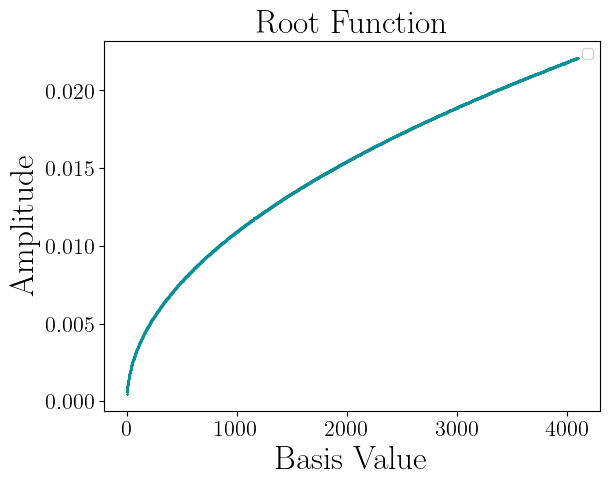

In [35]:
plot_output(circ_root,n,title="Root Function")

In [15]:
f = lambda x, mu=0, sigma=0.3: (1 / (sigma * (2 * 3.1416)**0.5)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

n = 12

state_vector = np.array([f(x) for x in np.linspace(-1,1,2**n)], dtype=complex)

target_mps = qtn.MatrixProductState.from_dense(state_vector,dims=[2]*n, )

target_mps_prep = MPSPreparation(target_mps,shape='lrp')   

overlap_gaus, circ_gaus = target_mps_prep.sequential_unitary_circuit(num_seq_layers=16) #,do_compression=True, max_bond_dim=3)

preparing mps using sequential unitaries (num_seq_layers=16)...


100%|██████████| 16/16 [00:01<00:00, 11.27it/s]


overlap from static seq. preparation = 0.9999996062350801 (from circ 0.9999995992518216),
n_gates=1167, n_2qg=385



C:\Users\0josh\AppData\Local\Temp\ipykernel_22768\338441124.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


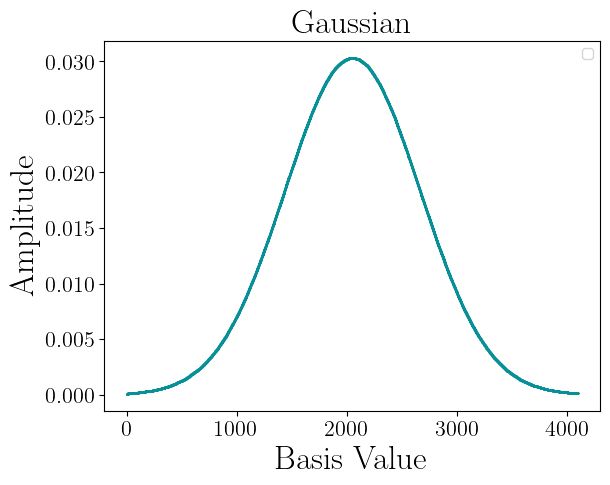

In [36]:
plot_output(circ_gaus,n,title="Gaussian")

Misc: Different Numbers of Layers

In [ ]:
n = 24

In [22]:
circs = []
overlaps = []
depths = []
for layer in range(2,101,2):
    overlap, circ = target_mps_prep.sequential_unitary_circuit(num_seq_layers=layer) #,do_compression=True, max_bond_dim=3)
    overlaps.append(overlap)
    circs.append(circ)
    depths.append(circ.depth())

preparing mps using sequential unitaries (num_seq_layers=2)...


100%|██████████| 2/2 [00:00<00:00, 14.36it/s]


overlap from static seq. preparation = 0.9997879781302216,
n_gates=209, n_2qg=63

preparing mps using sequential unitaries (num_seq_layers=4)...


100%|██████████| 4/4 [00:00<00:00, 16.10it/s]


overlap from static seq. preparation = 0.9999571228561878,
n_gates=338, n_2qg=106

preparing mps using sequential unitaries (num_seq_layers=6)...


100%|██████████| 6/6 [00:00<00:00, 14.02it/s]


overlap from static seq. preparation = 0.9999900356051070,
n_gates=476, n_2qg=152

preparing mps using sequential unitaries (num_seq_layers=8)...


100%|██████████| 8/8 [00:00<00:00, 14.05it/s]


overlap from static seq. preparation = 0.9999941109414495,
n_gates=605, n_2qg=195

preparing mps using sequential unitaries (num_seq_layers=10)...


100%|██████████| 10/10 [00:00<00:00, 12.67it/s]


overlap from static seq. preparation = 0.9999986332962116,
n_gates=731, n_2qg=237

preparing mps using sequential unitaries (num_seq_layers=12)...


100%|██████████| 12/12 [00:00<00:00, 13.21it/s]


overlap from static seq. preparation = 0.9999985098521923,
n_gates=896, n_2qg=292

preparing mps using sequential unitaries (num_seq_layers=14)...


100%|██████████| 14/14 [00:01<00:00, 11.92it/s]


overlap from static seq. preparation = 0.9999992231321687,
n_gates=1052, n_2qg=344

preparing mps using sequential unitaries (num_seq_layers=16)...


100%|██████████| 16/16 [00:01<00:00, 12.21it/s]


overlap from static seq. preparation = 0.9999995138127175,
n_gates=1217, n_2qg=399

preparing mps using sequential unitaries (num_seq_layers=18)...


100%|██████████| 18/18 [00:01<00:00, 10.73it/s]


overlap from static seq. preparation = 0.9999996442850845,
n_gates=1370, n_2qg=450

preparing mps using sequential unitaries (num_seq_layers=20)...


100%|██████████| 20/20 [00:01<00:00, 11.26it/s]


overlap from static seq. preparation = 0.9999998093522242,
n_gates=1475, n_2qg=485

preparing mps using sequential unitaries (num_seq_layers=22)...


100%|██████████| 22/22 [00:02<00:00, 10.44it/s]


overlap from static seq. preparation = 0.9999998717998816,
n_gates=1664, n_2qg=548

preparing mps using sequential unitaries (num_seq_layers=24)...


100%|██████████| 24/24 [00:02<00:00, 10.43it/s]


overlap from static seq. preparation = 0.9999998438400630,
n_gates=1805, n_2qg=595

preparing mps using sequential unitaries (num_seq_layers=26)...


100%|██████████| 26/26 [00:02<00:00,  9.91it/s]


overlap from static seq. preparation = 0.9999999214488391,
n_gates=1898, n_2qg=626

preparing mps using sequential unitaries (num_seq_layers=28)...


100%|██████████| 28/28 [00:02<00:00, 10.02it/s]


overlap from static seq. preparation = 0.9999999358873347,
n_gates=2048, n_2qg=676

preparing mps using sequential unitaries (num_seq_layers=30)...


100%|██████████| 30/30 [00:03<00:00,  8.94it/s]


overlap from static seq. preparation = 0.9999999555483924,
n_gates=2213, n_2qg=731

preparing mps using sequential unitaries (num_seq_layers=32)...


100%|██████████| 32/32 [00:03<00:00,  9.53it/s]


overlap from static seq. preparation = 0.9999999624064420,
n_gates=2309, n_2qg=763

preparing mps using sequential unitaries (num_seq_layers=34)...


100%|██████████| 34/34 [00:04<00:00,  8.37it/s]


overlap from static seq. preparation = 0.9999999702816504,
n_gates=2489, n_2qg=823

preparing mps using sequential unitaries (num_seq_layers=36)...


100%|██████████| 36/36 [00:04<00:00,  8.72it/s]


overlap from static seq. preparation = 0.9999999741844633,
n_gates=2624, n_2qg=868

preparing mps using sequential unitaries (num_seq_layers=38)...


100%|██████████| 38/38 [00:04<00:00,  7.89it/s]


overlap from static seq. preparation = 0.9999999663722434,
n_gates=2780, n_2qg=920

preparing mps using sequential unitaries (num_seq_layers=40)...


100%|██████████| 40/40 [00:04<00:00,  8.22it/s]


overlap from static seq. preparation = 0.9999999814505144,
n_gates=2852, n_2qg=944

preparing mps using sequential unitaries (num_seq_layers=42)...


100%|██████████| 42/42 [00:05<00:00,  7.61it/s]


overlap from static seq. preparation = 0.9999999817679369,
n_gates=3026, n_2qg=1002

preparing mps using sequential unitaries (num_seq_layers=44)...


100%|██████████| 44/44 [00:05<00:00,  7.95it/s]


overlap from static seq. preparation = 0.9999999880070704,
n_gates=3092, n_2qg=1024

preparing mps using sequential unitaries (num_seq_layers=46)...


100%|██████████| 46/46 [00:06<00:00,  7.31it/s]


overlap from static seq. preparation = 0.9999999883269636,
n_gates=3191, n_2qg=1057

preparing mps using sequential unitaries (num_seq_layers=48)...


100%|██████████| 48/48 [00:06<00:00,  7.41it/s]


overlap from static seq. preparation = 0.9999999892108780,
n_gates=3380, n_2qg=1120

preparing mps using sequential unitaries (num_seq_layers=50)...


100%|██████████| 50/50 [00:07<00:00,  7.01it/s]


overlap from static seq. preparation = 0.9999999898805724,
n_gates=3524, n_2qg=1168

preparing mps using sequential unitaries (num_seq_layers=52)...


100%|██████████| 52/52 [00:07<00:00,  7.08it/s]


overlap from static seq. preparation = 0.9999999905347497,
n_gates=3626, n_2qg=1202

preparing mps using sequential unitaries (num_seq_layers=54)...


100%|██████████| 54/54 [00:08<00:00,  6.71it/s]


overlap from static seq. preparation = 0.9999999912099827,
n_gates=3764, n_2qg=1248

preparing mps using sequential unitaries (num_seq_layers=56)...


100%|██████████| 56/56 [00:08<00:00,  6.92it/s]


overlap from static seq. preparation = 0.9999999921572186,
n_gates=3803, n_2qg=1261

preparing mps using sequential unitaries (num_seq_layers=58)...


100%|██████████| 58/58 [00:08<00:00,  6.60it/s]


overlap from static seq. preparation = 0.9999999923072362,
n_gates=3938, n_2qg=1306

preparing mps using sequential unitaries (num_seq_layers=60)...


100%|██████████| 60/60 [00:09<00:00,  6.54it/s]


overlap from static seq. preparation = 0.9999999926217443,
n_gates=4109, n_2qg=1363

preparing mps using sequential unitaries (num_seq_layers=62)...


100%|██████████| 62/62 [00:09<00:00,  6.25it/s]


overlap from static seq. preparation = 0.9999999923108499,
n_gates=4187, n_2qg=1389

preparing mps using sequential unitaries (num_seq_layers=64)...


100%|██████████| 64/64 [00:09<00:00,  6.43it/s]


overlap from static seq. preparation = 0.9999999926445097,
n_gates=4310, n_2qg=1430

preparing mps using sequential unitaries (num_seq_layers=66)...


100%|██████████| 66/66 [00:10<00:00,  6.06it/s]


overlap from static seq. preparation = 0.9999999927799998,
n_gates=4427, n_2qg=1469

preparing mps using sequential unitaries (num_seq_layers=68)...


100%|██████████| 68/68 [00:11<00:00,  6.00it/s]


overlap from static seq. preparation = 0.9999999926783134,
n_gates=4328, n_2qg=1436

preparing mps using sequential unitaries (num_seq_layers=70)...


100%|██████████| 70/70 [00:12<00:00,  5.75it/s]


overlap from static seq. preparation = 0.9999999923722387,
n_gates=4286, n_2qg=1422

preparing mps using sequential unitaries (num_seq_layers=72)...


100%|██████████| 72/72 [00:12<00:00,  5.92it/s]


overlap from static seq. preparation = 0.9999999926147013,
n_gates=4385, n_2qg=1455

preparing mps using sequential unitaries (num_seq_layers=74)...


100%|██████████| 74/74 [00:13<00:00,  5.55it/s]


overlap from static seq. preparation = 0.9999999923749081,
n_gates=4175, n_2qg=1385

preparing mps using sequential unitaries (num_seq_layers=76)...


100%|██████████| 76/76 [00:13<00:00,  5.68it/s]


overlap from static seq. preparation = 0.9999999922128373,
n_gates=4199, n_2qg=1393

preparing mps using sequential unitaries (num_seq_layers=78)...


100%|██████████| 78/78 [00:14<00:00,  5.31it/s]


overlap from static seq. preparation = 0.9999999918626047,
n_gates=4310, n_2qg=1430

preparing mps using sequential unitaries (num_seq_layers=80)...


100%|██████████| 80/80 [00:14<00:00,  5.43it/s]


overlap from static seq. preparation = 0.9999999931893448,
n_gates=4427, n_2qg=1469

preparing mps using sequential unitaries (num_seq_layers=82)...


100%|██████████| 82/82 [00:15<00:00,  5.17it/s]


overlap from static seq. preparation = 0.9999999915732055,
n_gates=4223, n_2qg=1401

preparing mps using sequential unitaries (num_seq_layers=84)...


100%|██████████| 84/84 [00:15<00:00,  5.37it/s]


overlap from static seq. preparation = 0.9999999931948047,
n_gates=4220, n_2qg=1400

preparing mps using sequential unitaries (num_seq_layers=86)...


100%|██████████| 86/86 [00:18<00:00,  4.67it/s]


overlap from static seq. preparation = 0.9999999915977138,
n_gates=4211, n_2qg=1397

preparing mps using sequential unitaries (num_seq_layers=88)...


100%|██████████| 88/88 [00:17<00:00,  4.89it/s]


overlap from static seq. preparation = 0.9999999921145768,
n_gates=4385, n_2qg=1455

preparing mps using sequential unitaries (num_seq_layers=90)...


100%|██████████| 90/90 [00:18<00:00,  4.80it/s]


overlap from static seq. preparation = 0.9999999924965393,
n_gates=4436, n_2qg=1472

preparing mps using sequential unitaries (num_seq_layers=92)...


100%|██████████| 92/92 [00:18<00:00,  4.86it/s]


overlap from static seq. preparation = 0.9999999921230590,
n_gates=4214, n_2qg=1398

preparing mps using sequential unitaries (num_seq_layers=94)...


100%|██████████| 94/94 [00:20<00:00,  4.66it/s]


overlap from static seq. preparation = 0.9999999915386533,
n_gates=4331, n_2qg=1437

preparing mps using sequential unitaries (num_seq_layers=96)...


100%|██████████| 96/96 [00:20<00:00,  4.73it/s]


overlap from static seq. preparation = 0.9999999927927025,
n_gates=4322, n_2qg=1434

preparing mps using sequential unitaries (num_seq_layers=98)...


100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


overlap from static seq. preparation = 0.9999999922195320,
n_gates=4196, n_2qg=1392

preparing mps using sequential unitaries (num_seq_layers=100)...


100%|██████████| 100/100 [00:22<00:00,  4.52it/s]


overlap from static seq. preparation = 0.9999999927721555,
n_gates=4271, n_2qg=1417

